# Results and Figures

I don't really know what this script is going to contain. I want to actually look at my results, compare them and make heads of it all. This script might also be used to make and save figures and look up things I need for the report.

Let chaos ensue!

## Setup

In [1]:
library("ggplot2")
library('dplyr')

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# We have a list of our different cancer-types of interest
cancer_list <- c('Bladder Cancer',
                 'Breast Cancer',
                 'Colorectal Cancer',
                 'Endometrial Cancer',
                 'Esophagogastric Cancer',
                 'Glioma',
                 'Head and Neck Cancer',
                 'Hepatobiliary Cancer',
                 'Mature B-Cell Neoplasms',
                 'Melanoma',
                 'Ovarian Cancer',
                 'Pancreatic Cancer',
                 'Prostate Cancer',
                 'Renal Cell Carcinoma',
                 'Soft Tissue Sarcoma',
                 'Thyroid Cancer')

# Mean Alone-factor

In [3]:
# Data
## Generel
general_alone_factor <- read.csv("../../derived_data/genie_v15/g_alone_factor.csv", header=TRUE, stringsAsFactors=FALSE)
general_alone_factor <- general_alone_factor %>% select(-group)
general_alone_factor <- cbind(cancer_type = 'General', general_alone_factor)
#head(general_alone_factor)
dim(general_alone_factor)

## Cancer-specific
cancer_specific_alone_factor <- read.csv("../../derived_data/genie_v15/cs_alone_factor.csv", header=TRUE, stringsAsFactors=FALSE)
cancer_specific_alone_factor <- cancer_specific_alone_factor %>% select(-group)
#head(cancer_specific_alone_factor)
dim(cancer_specific_alone_factor)

# Combining them
alone_factor <- rbind(general_alone_factor, cancer_specific_alone_factor)
head(alone_factor)
dim(alone_factor)

[1] 1292133       6

[1] 1104470       6

,cancer_type,age_interval,sex,sample_type,Hugo_Symbol,alone_factor
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,General,<45,Male,Primary,BRAF,0.3333333
2,General,<45,Male,Primary,FBXW7,0.3333333
3,General,<45,Male,Primary,NOTCH1,0.3333333
4,General,<45,Male,Primary,TP53,0.3333333
5,General,<45,Male,Primary,FGFR3,0.3333333
6,General,<45,Male,Primary,APC,0.3333333


[1] 2396603       6

In [4]:
# How many times has each gene been tested?
## general
g_n <- general_alone_factor %>% group_by(Hugo_Symbol, sex, sample_type) %>% summarise(n=n())
## cancer-specific
cs_n <- cancer_specific_alone_factor %>% group_by(Hugo_Symbol, cancer_type, sex, sample_type) %>% summarise(n=n())

# What is the mean alone-factor?
## general
g_mean <- general_alone_factor %>% group_by(Hugo_Symbol, sex, sample_type) %>% summarise(m_alone_factor=mean(alone_factor))
## cancer-specific
cs_mean <- cancer_specific_alone_factor %>% group_by(Hugo_Symbol, cancer_type, sex, sample_type) %>% summarise(m_alone_factor=mean(alone_factor))

# Combining the two results
## general
g_mean_alone <- left_join(g_n, g_mean, by = c("Hugo_Symbol" = "Hugo_Symbol", "sex" = "sex", "sample_type" = "sample_type"))
## cancer-specific
cs_mean_alone <- left_join(cs_n, cs_mean, by = c("Hugo_Symbol" = "Hugo_Symbol", "cancer_type" = "cancer_type", "sex" = "sex", "sample_type" = "sample_type"))

# Limiting our search to genes with more than 100 mutations
g_mean_alone <- g_mean_alone[which(g_mean_alone$n>100),]
# Sorting by percentage of mutations
tmp <- g_mean_alone[order(-g_mean_alone$m_alone_factor), ]
# Top 10
tmp[1:10,]

`summarise()` has grouped output by 'Hugo_Symbol', 'sex'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Hugo_Symbol', 'cancer_type', 'sex'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Hugo_Symbol', 'sex'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Hugo_Symbol', 'cancer_type', 'sex'. You can override using the
`.groups` argument.


Hugo_Symbol,sex,sample_type,n,m_alone_factor
<chr>,<chr>,<chr>,<int>,<dbl>
EIF1AX,Female,Metastasis,279,0.3054219
EIF1AX,Male,Primary,689,0.2957824
EIF1AX,Male,Metastasis,294,0.2951349
EIF1AX,Female,Primary,757,0.2920278
BRAF,Male,Metastasis,1718,0.2755679
BRAF,Female,Metastasis,1600,0.2656970
SPOP,Male,Primary,605,0.2649204
NRAS,Male,Primary,1126,0.2647109
NRAS,Female,Metastasis,735,0.2572229


In [5]:
#Ranking the general data
g_mean_alone$rank <- NA
g_mean_alone$rank <- rank(g_mean_alone$m_alone_factor)
tmp <- g_mean_alone[order(-g_mean_alone$rank), ]
#tmp[1:10,]

# Finding the mean rank in the general data
mean_rank <- g_mean_alone %>% group_by(Hugo_Symbol) %>% summarize(m_rank = mean(rank, na.rm=TRUE))
mean_rank <- mean_rank[order(-mean_rank$m_rank), ]
mean_rank[1:10,]

# High rank --> high alone-factor

Hugo_Symbol,m_rank
<chr>,<dbl>
EIF1AX,2250.50
BRAF,2244.00
NRAS,2241.50
KRAS,2239.00
TP53,2232.00
IDH1,2218.25
EGFR,2213.50
VHL,2213.00
USH2A,2206.00


In [6]:
rank_fp <- g_mean_alone[which(g_mean_alone$sex == 'Female' & g_mean_alone$sample_type == 'Primary'), ]
rank_fp <- rank_fp[order(-rank_fp$rank), ]

rank_mp <- g_mean_alone[which(g_mean_alone$sex == 'Male' & g_mean_alone$sample_type == 'Primary'), ]
rank_mp <- rank_mp[order(-rank_mp$rank), ]

rank_fm <- g_mean_alone[which(g_mean_alone$sex == 'Female' & g_mean_alone$sample_type == 'Metastasis'), ]
rank_fm <- rank_fm[order(-rank_fm$rank), ]

rank_mm <- g_mean_alone[which(g_mean_alone$sex == 'Male' & g_mean_alone$sample_type == 'Metastasis'), ]
rank_mm <- rank_mm[order(-rank_mm$rank), ]

group_rank <- rbind(rank_fp[1:10,], rank_mp[1:10,])
group_rank <- rbind(group_rank, rank_fm[1:10,])
group_rank <- rbind(group_rank, rank_mm[1:10,])

group_rank

Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
EIF1AX,Female,Primary,757,0.2920278,2249
BRAF,Female,Primary,2906,0.2535068,2240
KRAS,Female,Primary,8383,0.2463658,2238
TP53,Female,Primary,21126,0.2403966,2235
NRAS,Female,Primary,1062,0.2306710,2234
EGFR,Female,Primary,3972,0.2196326,2227
VHL,Female,Primary,467,0.1973821,2221
IDH1,Female,Primary,1470,0.1906438,2216
KIT,Female,Primary,1783,0.1886996,2215


In [7]:
#Ranking the general data
cs_mean_alone$rank <- NA
cs_mean_alone$rank <- rank(cs_mean_alone$m_alone_factor)
tmp <- cs_mean_alone[order(-cs_mean_alone$rank), ]
#tmp[1:10,]

# Finding the mean rank in the general data
mean_rank <- cs_mean_alone %>% group_by(Hugo_Symbol) %>% summarize(m_rank = mean(rank, na.rm=TRUE))
mean_rank <- mean_rank[order(-mean_rank$m_rank), ]
mean_rank[1:10,]

# High rank --> high alone-factor

Hugo_Symbol,m_rank
<chr>,<dbl>
FGFR1OP,49833.5
RP11-326G21.1,49833.5
YY1AP1,49833.5
PRPS2,49573.5
COPB1,49401.0
TRAJ7,49401.0
PPP2CB,48990.5
GH1,48835.0
CSNK1A1,48500.0


In [8]:
rank_fp <- cs_mean_alone[which(cs_mean_alone$sex == 'Female' & cs_mean_alone$sample_type == 'Primary'), ]
rank_fp <- rank_fp[order(-rank_fp$rank), ]

rank_mp <- cs_mean_alone[which(cs_mean_alone$sex == 'Male' & cs_mean_alone$sample_type == 'Primary'), ]
rank_mp <- rank_mp[order(-rank_mp$rank), ]

rank_fm <- cs_mean_alone[which(cs_mean_alone$sex == 'Female' & cs_mean_alone$sample_type == 'Metastasis'), ]
rank_fm <- rank_fm[order(-rank_fm$rank), ]

rank_mm <- cs_mean_alone[which(cs_mean_alone$sex == 'Male' & cs_mean_alone$sample_type == 'Metastasis'), ]
rank_mm <- rank_mm[order(-rank_mm$rank), ]

cs_group_rank <- rbind(rank_fp[1:10,], rank_mp[1:10,])
cs_group_rank <- rbind(cs_group_rank, rank_fm[1:10,])
cs_group_rank <- rbind(cs_group_rank, rank_mm[1:10,])

group_rank_count <- cs_group_rank %>% group_by(Hugo_Symbol) %>% summarise(n = n())
#group_rank_count[which(group_rank_count$n==4),]
#group_rank_count[which(group_rank_count$n==3),]
group_rank_count[which(group_rank_count$n==2),]
#group_rank_count[which(group_rank_count$n==1),]

Hugo_Symbol,n
<chr>,<int>
CDKN2B,2
HIST1H3E,2


In [9]:
head(group_rank)

Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
EIF1AX,Female,Primary,757,0.2920278,2249
BRAF,Female,Primary,2906,0.2535068,2240
KRAS,Female,Primary,8383,0.2463658,2238
TP53,Female,Primary,21126,0.2403966,2235
NRAS,Female,Primary,1062,0.2306710,2234
EGFR,Female,Primary,3972,0.2196326,2227


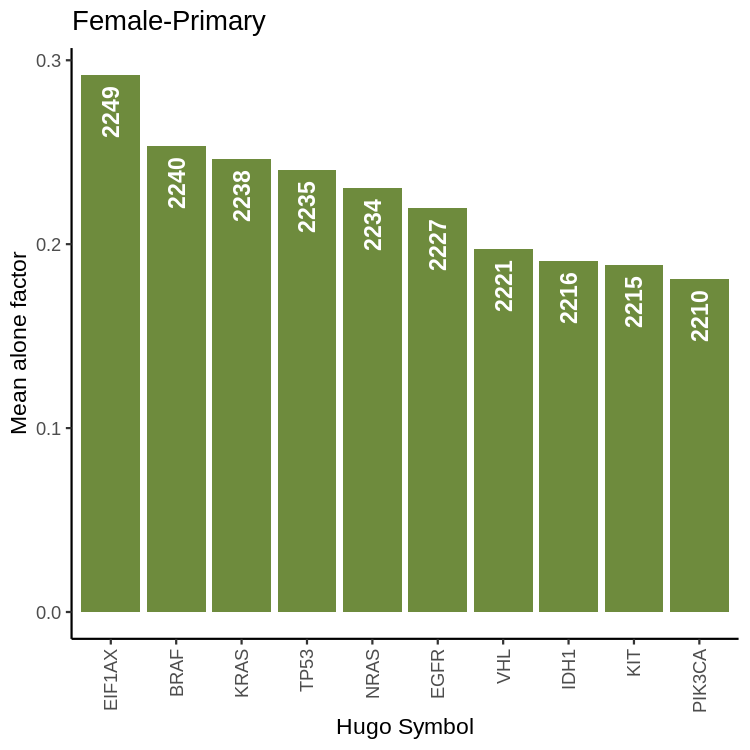

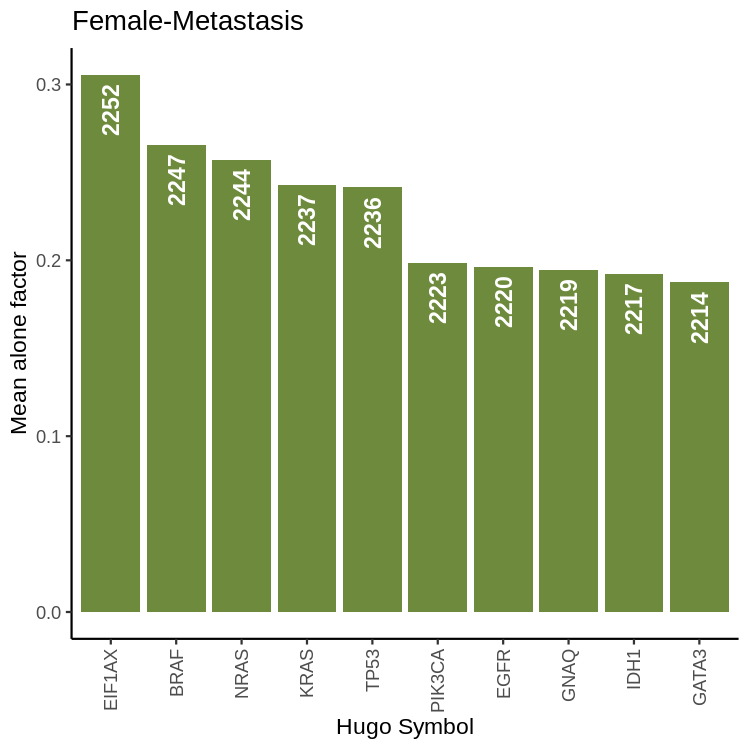

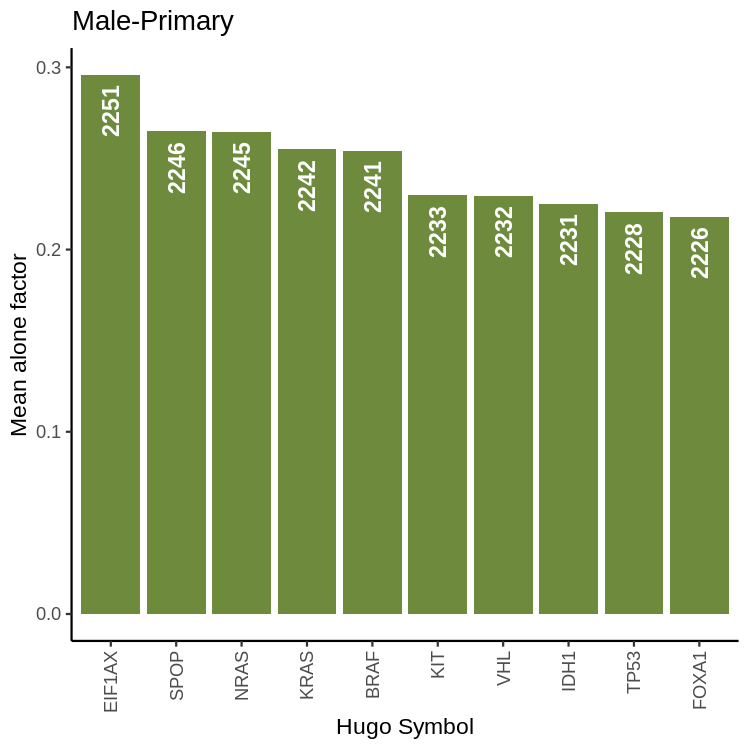

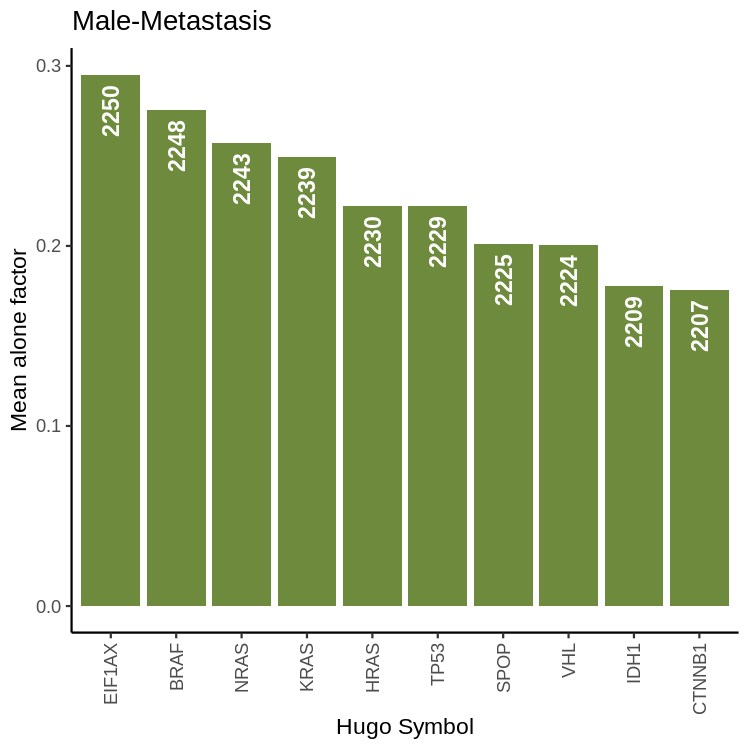

In [11]:
#group_rank
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)


for (the_sex in c('Female', 'Male')){
    for (the_sample_type in c('Primary', 'Metastasis')){
        # define our data
        tmp <- group_rank[which(group_rank$sex == the_sex & group_rank$sample_type == the_sample_type),]
        
        tmp <- tmp %>% arrange(desc(m_alone_factor), desc(rank))
        
        top20 <- tmp[1:10,]
        lvl20 <- top20[[1]]
        
        top20$Hugo_Symbol <- factor(top20$Hugo_Symbol, levels = lvl20)
        
        q <- ggplot(top20, aes(x=Hugo_Symbol)) + 
        geom_bar(aes(y=m_alone_factor), stat="identity", position = "identity", fill='darkolivegreen4') +
        geom_text(aes(y=m_alone_factor-0.02, label=rank, angle = 90), vjust=0.5, colour = 'white', fontface = "bold") +
        theme_classic() +
        xlab('Hugo Symbol') +
        ylab('Mean alone factor') +
        ggtitle(paste(the_sex, the_sample_type, sep='-')) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
        
        print(q)
    }
}

In [16]:
test <- group_rank %>% group_by(Hugo_Symbol) %>% summarise(n=n())

test[which(test$n==4),]
test[which(test$n==3),]
test[which(test$n==2),]
group_rank[which(group_rank$Hugo_Symbol=='EGFR'),]
group_rank[which(group_rank$Hugo_Symbol=='KIT'),]
group_rank[which(group_rank$Hugo_Symbol=='PIK3CA'),]
group_rank[which(group_rank$Hugo_Symbol=='SPOP'),]
test[which(test$n==1),]
group_rank[which(group_rank$Hugo_Symbol=='CTNNB1'),]
group_rank[which(group_rank$Hugo_Symbol=='FOXA1'),]
group_rank[which(group_rank$Hugo_Symbol=='GATA3'),]
group_rank[which(group_rank$Hugo_Symbol=='GNAQ'),]
group_rank[which(group_rank$Hugo_Symbol=='HRAS'),]

Hugo_Symbol,n
<chr>,<int>
BRAF,4
EIF1AX,4
IDH1,4
KRAS,4
NRAS,4
TP53,4


Hugo_Symbol,n
<chr>,<int>
VHL,3


Hugo_Symbol,n
<chr>,<int>
EGFR,2
KIT,2
PIK3CA,2
SPOP,2


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
EGFR,Female,Primary,3972,0.2196326,2227
EGFR,Female,Metastasis,1848,0.1963172,2220


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
KIT,Female,Primary,1783,0.1886996,2215
KIT,Male,Primary,1578,0.2297539,2233


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
PIK3CA,Female,Primary,9730,0.1809648,2210
PIK3CA,Female,Metastasis,4332,0.1983838,2223


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
SPOP,Male,Primary,605,0.2649204,2246
SPOP,Male,Metastasis,289,0.2011476,2225


Hugo_Symbol,n
<chr>,<int>
CTNNB1,1
FOXA1,1
GATA3,1
GNAQ,1
HRAS,1


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
CTNNB1,Male,Metastasis,691,0.1753311,2207


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
FOXA1,Male,Primary,778,0.2178649,2226


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
GATA3,Female,Metastasis,944,0.1874347,2214


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
GNAQ,Female,Metastasis,219,0.1943969,2219


Hugo_Symbol,sex,sample_type,n,m_alone_factor,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
HRAS,Male,Metastasis,239,0.2221859,2230


## Testing and significant chi2-gof results

In [10]:
## Proof of concept using generel dataset

# Load in chi2-gof results
g_chi2_gof_results <- read.csv("../../derived_data/chi2_gof_test_results/general.csv")
g_chi2_gof_results <- g_chi2_gof_results %>% select(-X, -NA.)
#head(g_chi2_gof_results)

# Count how often each gene is present, this is equvalent to how often it is tested
g_test_count <- as.data.frame(table(g_chi2_gof_results$Hugo_Symbol))

# Renaming columns
g_test_count <- rename(g_test_count, Hugo_Symbol = Var1)
g_test_count <- rename(g_test_count, n_test = Freq)

# Make table with only significant genes
g_mut_sig <- g_chi2_gof_results[which(g_chi2_gof_results$p_value < 0.05/6764),]

# Count how often each gene is significant
g_sig_count <- as.data.frame(table(g_mut_sig$Hugo_Symbol))

# Renaming columns
g_sig_count <- rename(g_sig_count, Hugo_Symbol = Var1)
g_sig_count <- rename(g_sig_count, n_sig = Freq)

# Merge the tables
g_test_and_sig <- left_join(g_test_count, g_sig_count, by = "Hugo_Symbol")

# Replacing NA in sig column with 0
g_test_and_sig <- g_test_and_sig %>% mutate(n_sig = ifelse(is.na(n_sig), 0, n_sig))

# Calculate percentage of times it is found to be significant
g_test_and_sig <- g_test_and_sig %>% mutate(sig_perc = n_sig / n_test)

# Sort table
g_test_and_sig <- g_test_and_sig %>% arrange(desc(sig_perc), desc(n_test))

# Make figure, top 10 most commonly significant
head(g_test_and_sig, 10)

# Make figure with top 10 least significant
tail(g_test_and_sig, 10)

,Hugo_Symbol,n_test,n_sig,sig_perc
,<fct>,<int>,<dbl>,<dbl>
1,AKT1,4,4,1
2,APC,4,4,1
3,ARID1A,4,4,1
4,ARID2,4,4,1
5,ATM,4,4,1
6,BAP1,4,4,1
7,BRCA1,4,4,1
8,BRCA2,4,4,1
9,CDH1,4,4,1


,Hugo_Symbol,n_test,n_sig,sig_perc
,<fct>,<int>,<dbl>,<dbl>
291,SDHD,4,0,0
292,SH2D1A,4,0,0
293,SMAD3,4,0,0
294,SMARCD1,4,0,0
295,SOCS1,4,0,0
296,STAT5B,4,0,0
297,SYK,4,0,0
298,TMEM127,4,0,0
299,TRAF7,4,0,0


In [11]:
# Making one table for results and significance
chi2_gof_results <- g_chi2_gof_results
mut_sig <- g_mut_sig

for (idx in 1:length(cancer_list)){
    # Get cancer name
    name <- cancer_list[idx]
    # Get file name
    file_name <- gsub(" ", "_", name)
    
    # Loading the cs result file
    file_path <- paste("../../derived_data/chi2_gof_test_results/", file_name, ".csv", sep='')
    cs_chi2_gof_results <- read.csv(file_path)
    cs_chi2_gof_results <- cs_chi2_gof_results %>% select(-X)
    # Adding the results to our table
    chi2_gof_results <- rbind(chi2_gof_results, cs_chi2_gof_results)
    
    # Finding how often we have tested in the cancer-specific dataset
    n_test <- nrow(cs_chi2_gof_results)
    # Making a table of only bonferonni corrected significant mutations
    cs_mut_sig <- cs_chi2_gof_results[which(cs_chi2_gof_results$p_value <= 0.05/n_test),]
    # Adding the significant mutations to the table
    mut_sig <- rbind(mut_sig, cs_mut_sig)
}

head(mut_sig)

,Hugo_Symbol,sex,sample_type,X_squared,df,p_value
,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
2,MUTYH,Female,Primary,53.94773,4,5.396985e-11
3,MUTYH,Male,Metastasis,32.28869,4,1.670015e-06
6,FGF19,Female,Primary,32.10429,4,1.821462e-06
9,DDR2,Male,Primary,65.38784,4,2.131875e-13
10,DDR2,Female,Primary,135.01811,4,3.288048e-28
11,DDR2,Male,Metastasis,62.82184,4,7.397809e-13


# Making it a figure
top20 <- temut_sigst_and_sig[1:20,]
lvl20 <- top20[[1]]

top20$Hugo_Symbol <- factor(top20$Hugo_Symbol, levels = lvl20)

ggplot(top20, aes(x=Hugo_Symbol)) + 
geom_bar(aes(y=n_test), stat="identity", position = "identity", fill='palevioletred1') +
geom_bar(aes(y=n_sig), stat="identity", position = "identity", fill='black', alpha=0.5) +
geom_text(aes(y=n_sig-3, label=paste(round(sig_perc, digits = 2), '%', sep=' '), angle = 90), vjust=0.5, colour = 'white', fontface = "bold") +
theme_classic() +
xlab('Hugo Symbol') +
ylab('# times tested') +
ggtitle('Top 20 significant genes') +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

## Chi2-gof mutations of interest

In [13]:
interest <- read.csv("../../derived_data/chi2_gof_results_of_interest")
interest <- interest %>% select(-X)

dim(interest)
head(interest)

[1] 442   7

,cancer_type,Hugo_Symbol,sex,sample_type,sum_of_absolute_difference,p_value,n
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,General,CDKN2A,Male,Primary,56.68998,1.432424e-76,907
2,General,CDKN2A,Female,Primary,63.13009,7.299446e-67,698
3,General,CDKN2A,Male,Metastasis,56.36045,1.030006e-51,660
4,General,TP53,Male,Primary,45.67578,9.999889e-321,12669
5,General,TP53,Female,Primary,54.41339,9.999889e-321,14193
6,General,TP53,Male,Metastasis,47.61708,9.999889e-321,7783


In [14]:
# make table to save results
group_interest_results <- data.frame(matrix(ncol = 6, nrow = 0))
colnames(group_interest_results) <- c('Hugo_Symbol', 'n_test', 'n_int', 'int_perc', 'sex', 'sample_type')

for (the_sex in c('Female', 'Male')){
    for (the_sample_type in c('Primary', 'Metastasis')){
        # defining our data
        group_chi_results <- chi2_gof_results[which(chi2_gof_results$sex == the_sex & chi2_gof_results$sample_type == the_sample_type),]
        group_interest <- interest[which(interest$sex == the_sex & interest$sample_type == the_sample_type),]
        
        # how often we have tested count
        test_count <- as.data.frame(table(group_chi_results$Hugo_Symbol))
        test_count <- rename(test_count, Hugo_Symbol = Var1)
        test_count <- rename(test_count, n_test = Freq)
        
        # How often somthing is interesting
        int_count <- as.data.frame(table(group_interest$Hugo_Symbol))
        int_count <- rename(int_count, Hugo_Symbol = Var1)
        int_count <- rename(int_count, n_int = Freq)
        
        # Merge
        test_and_int <- left_join(test_count, int_count, by = "Hugo_Symbol")

        # Replacing NA in sig column with 0
        test_and_int <- test_and_int %>% mutate(n_int = ifelse(is.na(n_int), 0, n_int))

        # Calculate percentage of times it is found to be significant
        test_and_int <- test_and_int %>% mutate(int_perc = (n_int / n_test)*100)
        
        # Sort table
        test_and_int <- test_and_int %>% arrange(desc(int_perc), desc(n_test))
        
        # min 2 tests performed
        test_and_int <- test_and_int[which(test_and_int$n_test > 2),]
        
        # Add sex and sample-type to table
        test_and_int$sex <- the_sex
        test_and_int$sample_type <- the_sample_type

        # add to group result
        group_interest_results <- rbind(group_interest_results, test_and_int)
    }
}

head(group_interest_results)

,Hugo_Symbol,n_test,n_int,int_perc,sex,sample_type
,<fct>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,TP53,11,8,72.72727,Female,Primary
2,BRAF,10,4,40.00000,Female,Primary
3,PIK3CA,10,3,30.00000,Female,Primary
4,PTEN,11,3,27.27273,Female,Primary
5,MAP2K1,8,2,25.00000,Female,Primary
6,AXIN2,4,1,25.00000,Female,Primary


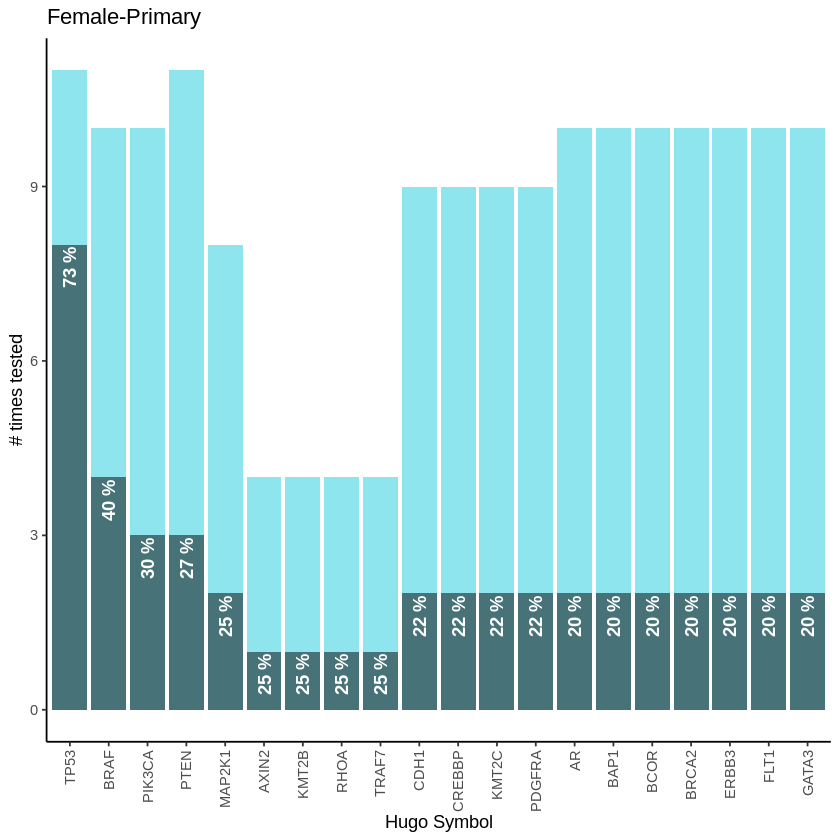

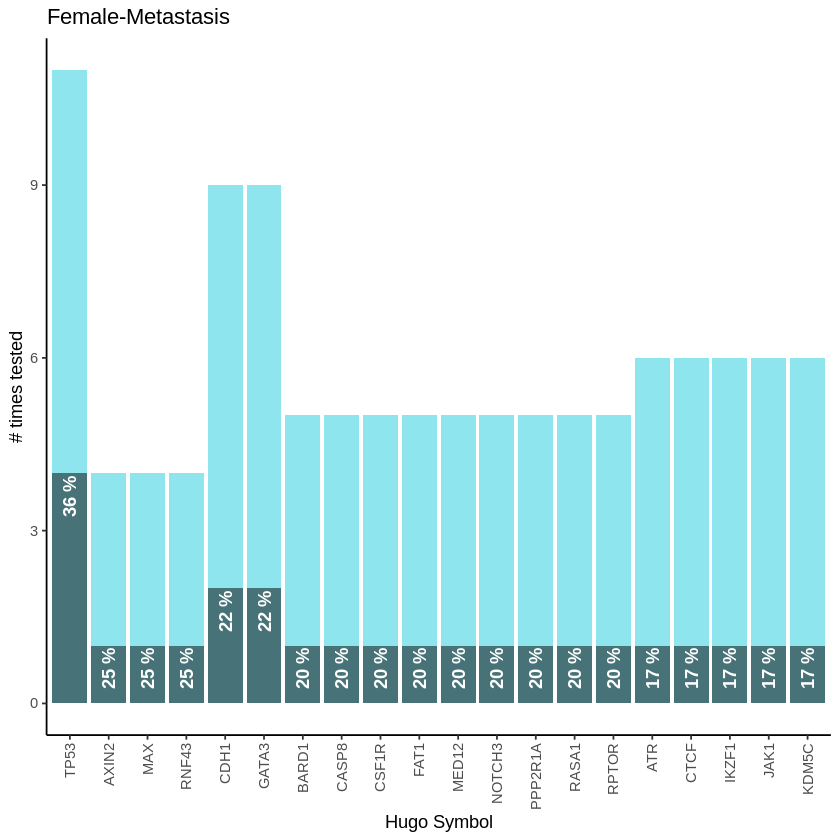

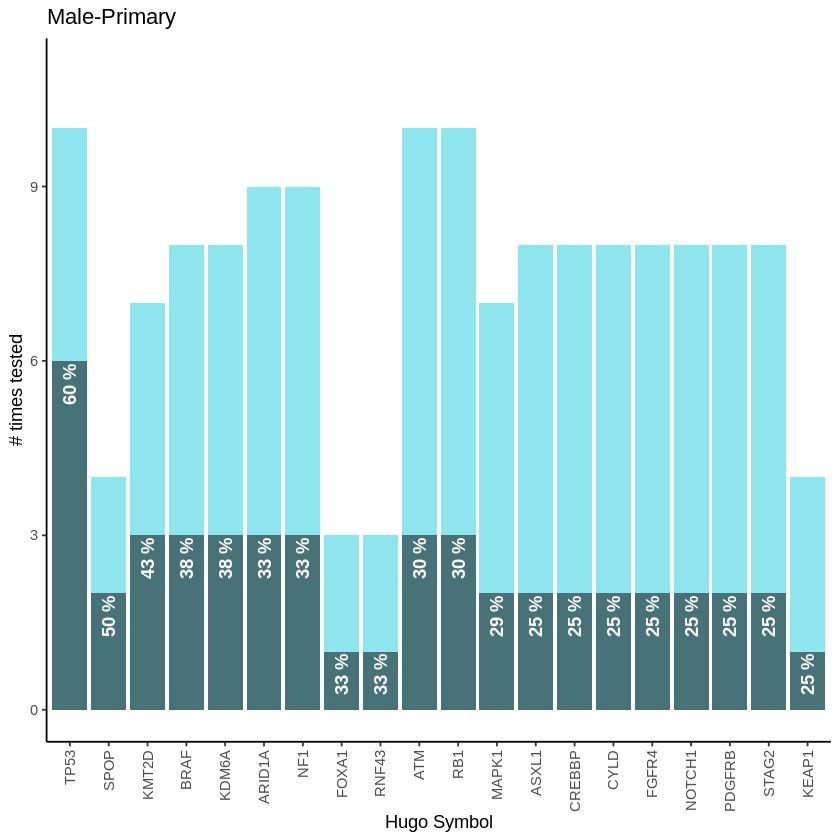

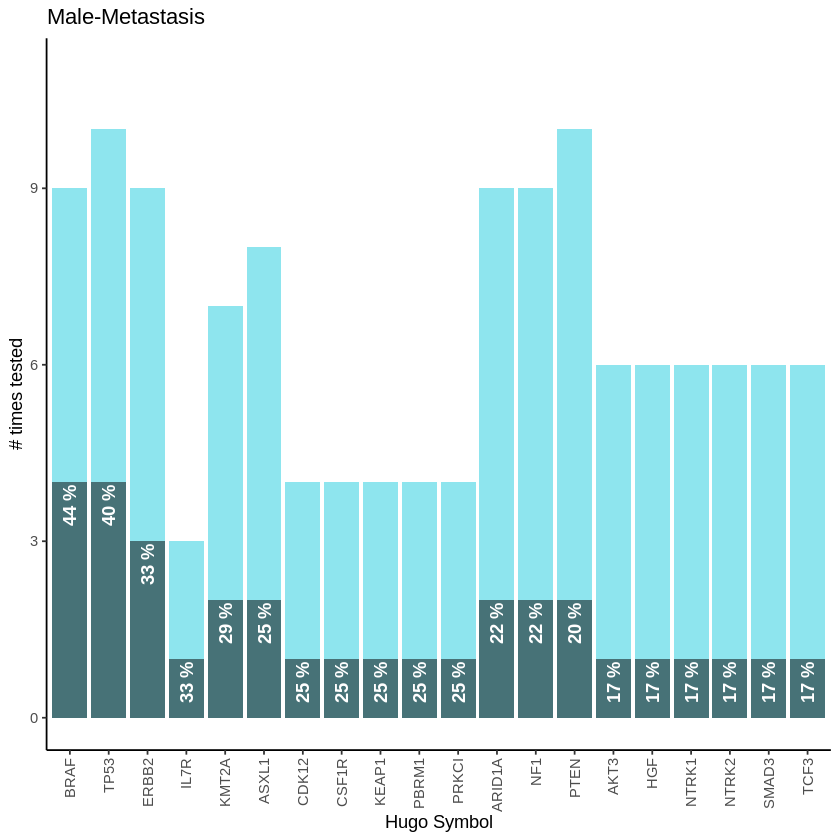

In [15]:
for (the_sex in c('Female', 'Male')){
    for (the_sample_type in c('Primary', 'Metastasis')){
        # define our data
        tmp <- group_interest_results[which(group_interest_results$sex == the_sex & group_interest_results$sample_type == the_sample_type),]
        
        tmp <- tmp %>% arrange(desc(int_perc), desc(n_test))
        
        top20 <- tmp[1:20,]
        lvl20 <- top20[[1]]
        
        top20$Hugo_Symbol <- factor(top20$Hugo_Symbol, levels = lvl20)
        
        q <- ggplot(top20, aes(x=Hugo_Symbol)) + 
        geom_bar(aes(y=n_test), stat="identity", position = "identity", fill='#8EE5EE') +
        geom_bar(aes(y=n_int), stat="identity", position = "identity", fill='black', alpha=0.5) +
        geom_text(aes(y=n_int-0.4, label=paste(round(int_perc, digits = 0), '%', sep=' '), angle = 90), vjust=0.5, colour = 'white', fontface = "bold") +
        theme_classic() +
        ylim(0, 11) +
        xlab('Hugo Symbol') +
        ylab('# times tested') +
        ggtitle(paste(the_sex, the_sample_type, sep='-')) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
        
        print(q)
    }
}



In [37]:
top20 <- data.frame(matrix(ncol = 6, nrow = 0))
colnames(group_interest_results) <- c('Hugo_Symbol', 'n_test', 'n_int', 'int_perc', 'sex', 'sample_type')

for (the_sex in c('Female', 'Male')){
    for (the_sample_type in c('Primary', 'Metastasis')){
        # define our data
        tmp <- group_interest_results[which(group_interest_results$sex == the_sex & group_interest_results$sample_type == the_sample_type),]
        
        tmp <- tmp %>% arrange(desc(int_perc), desc(n_test))
        
        group_top20 <- tmp[1:20, ]
        
        top20 <- rbind(top20, group_top20)
    }
}

top20_count <- top20 %>% group_by(Hugo_Symbol) %>% summarise(n = n())

#top20_count[which(top20_count$n==4),]
#top20_count[which(top20_count$n==3),]
#top20_count[which(top20_count$n==2),]
#top20[which(top20$Hugo_Symbol=='ARID1A'),]
#top20[which(top20$Hugo_Symbol=='ASXL1'),]
#top20[which(top20$Hugo_Symbol=='AXIN2'),]
#top20[which(top20$Hugo_Symbol=='CDH1'),]
#top20[which(top20$Hugo_Symbol=='CREBBP'),]
#top20[which(top20$Hugo_Symbol=='CSF1R'),]
#top20[which(top20$Hugo_Symbol=='GATA3'),]
#top20[which(top20$Hugo_Symbol=='KEAP1'),]
#top20[which(top20$Hugo_Symbol=='NF1'),]
#top20[which(top20$Hugo_Symbol=='PTEN'),]
#top20[which(top20$Hugo_Symbol=='RNF43'),]
top20_count[which(top20_count$n==1),]

Hugo_Symbol,n
<fct>,<int>
AKT3,1
AR,1
ATM,1
ATR,1
BAP1,1
BARD1,1
BCOR,1
BRCA2,1
CASP8,1


## Expectation vs. Observed

In [17]:
# What is the general/cancer-specific and gruop results for Af and genes of interest?

# Plot exp vs. obs for the ones of interest
